In [3]:
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt


In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [17]:
text="Hello my name is youngbo ha ha"
text2='this sentence is second sentence'
text3='this is test sentence'
text4='good to go to picnic'
# marked_text = "[CLS] " + text + " [SEP]"
# marked_text2 = "[CLS] " + text2 + " [SEP]"
# marked_text3 = "[CLS] " + text3 + " [SEP]"
# marked_text4 = "[CLS] " + text4 + " [SEP]"
batch_text=[text,text2, text3,text4]

result=tokenizer(batch_text, 
                 add_special_tokens=True, 
                 max_length=100, 
                 padding="max_length",
                 truncation=True,
                 return_tensors="pt")
# print(result)
model = BertModel.from_pretrained('bert-base-uncased')
with torch.no_grad():
    output = model(**result)
print(output.last_hidden_state.shape)
out=output.last_hidden_state.mean(axis=1)
print(out.shape)

torch.Size([4, 100, 768])
torch.Size([4, 768])


In [4]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
indexed_tokens

[101, 7592, 2026, 2171, 2003, 2402, 5092, 102]

In [17]:
indexed_tokens2 = list(map(tokenizer.convert_tokens_to_ids,tokenized_text2))
indexed_tokens2

[[101, 7592, 2026, 2171, 2003, 2402, 5092, 102],
 [101, 2023, 6251, 2003, 2117, 6251, 102]]

In [5]:
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
hello         7,592
my            2,026
name          2,171
is            2,003
young         2,402
##bo          5,092
[SEP]           102


In [ ]:
segments_ids = [1] * len(tokenized_text)
segments_ids

In [23]:
# segments_ids = [1] * len(tokenized_text)
# segments_ids
def make_seg_ids(lst):
    result=[]
    for i in range(len(lst)):
        result.append(lst[i]*[1])
    return result
len_token=list(map(len,tokenized_text2))
print(len_token)
segments_ids2=make_seg_ids(len_token)
segments_ids2

[8, 7]


[[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]

In [25]:
print(indexed_tokens2)
tokens_tensor = torch.tensor(indexed_tokens2)
segments_tensors = torch.tensor(segments_ids2)
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)


[[101, 7592, 2026, 2171, 2003, 2402, 5092, 102], [101, 2023, 6251, 2003, 2117, 6251, 102]]


ValueError: expected sequence of length 8 at dim 1 (got 7)

In [6]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): FusedLayerNorm(torch.Size([768]), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): FusedLayerNorm(torch.Size([768]), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(

In [7]:
with torch.no_grad():
    encoded_layers, _ = model(tokens_tensor, segments_tensors)
#     hidden_states = outputs[2]

In [8]:
encoded_layers[0]

AttributeError: 'list' object has no attribute 'shape'

In [10]:
print ("Number of layers:", len(encoded_layers))
layer_i = 0

print ("Number of batches:", len(encoded_layers[layer_i]))
batch_i = 0

print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

# 8개의 개별 토큰(단어)이 768차원의 12개의 개별 벡터를 가짐 
print(encoded_layers[0].shape, encoded_layers[11].shape)

Number of layers: 12
Number of batches: 1
Number of tokens: 8
Number of hidden units: 768
torch.Size([1, 8, 768]) torch.Size([1, 8, 768])


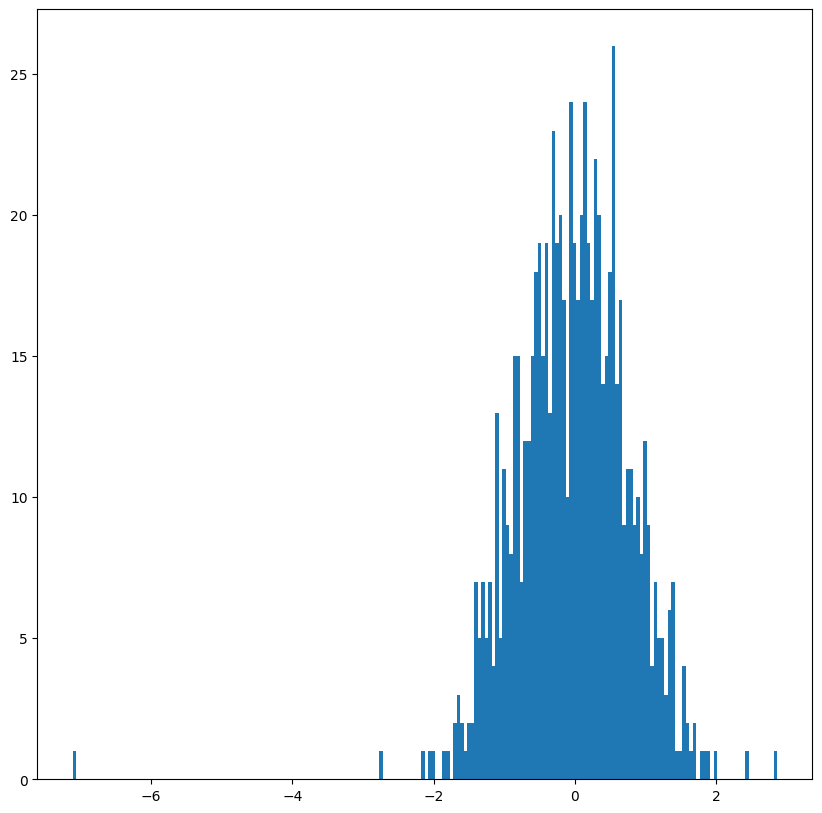

In [11]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [12]:
token_embeddings = torch.stack(encoded_layers, dim=0)

token_embeddings.size()



torch.Size([12, 1, 8, 768])

In [13]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([12, 8, 768])

In [14]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()# 8개의 개별 토큰(단어)이 768차원의 12개의 개별 벡터를 가짐 

torch.Size([8, 12, 768])

In [15]:
# Stores the token vectors, with shape [8 x 3,072]
token_vecs_cat = []

# `token_embeddings` is a [8 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 8 x 3072


In [16]:
# `encoded_layers` has shape [12 x 1 x 8 x 768]

# `token_vecs` is a tensor with shape [8 x 768]
token_vecs = encoded_layers[11][0]

# Calculate the average of all 8 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)

In [17]:
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

Our final sentence embedding vector of shape: torch.Size([768])


In [18]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 hello
2 my
3 name
4 is
5 young
6 ##bo
7 [SEP]
